open X:\Macropinocytosis\BMM-KOs\20230823cs5cell1WT\*488nm*.tif;

#surface render#
material dull;
lighting full;
lighting depthcue false;
set bg transparent;
windowsize 800 800;
volume #1 step 3 level 145 color #023b55 voxelsize 0.1028;
view orient;
windowsize 800 800;

In [ ]:
from chimerax.color_key import show_key
from chimerax.core import colors
from chimerax.std_commands.wait import wait
from chimerax.surface import vertex_convexity
from chimerax.core.commands import (BoolArg, Bounded, CmdDesc, ColormapArg,
                                    ColormapRangeArg, Int2Arg, IntArg,
                                    SurfacesArg, StringArg, FloatArg, SurfaceArg, AxisArg)
from chimerax.core.commands.cli import EnumOf
from chimerax.map.volumecommand import volume
from chimerax.std_commands.cd import (cd)
from os.path import exists
import numpy
from chimerax.surface.dust import largest_blobs_triangle_mask 
from numpy import (arccos, array, full, inf, isnan, mean, nan, nanmax, nanmean,
                   nanmin, pi, ravel_multi_index, sign, split, sqrt, subtract,
                   count_nonzero, swapaxes, savetxt, column_stack,nansum, nanstd,
                   unique, column_stack, round_, int64, abs, digitize, linspace,
                   zeros, where, delete, shape, ravel, min, shape, isin,flip)
from scipy.ndimage import (binary_dilation, binary_erosion,
                           generate_binary_structure, iterate_structure, gaussian_filter)
from scipy.spatial import KDTree
from skimage.morphology import (skeletonize,label)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from chimerax.map_data import ArrayGridData 
from chimerax.map import volume_from_grid_data



In [ ]:
surface=session.models[1]
mask_vol = surface.volume.full_matrix().copy()
level = surface.volume.maximum_surface_level
mask=ArrayGridData((mask_vol>=level))
volume_from_grid_data(mask,session)

In [ ]:

mask=ArrayGridData(gaussian_filter((mask_vol>=level),sigma=0.1))
volume_from_grid_data(mask,session)

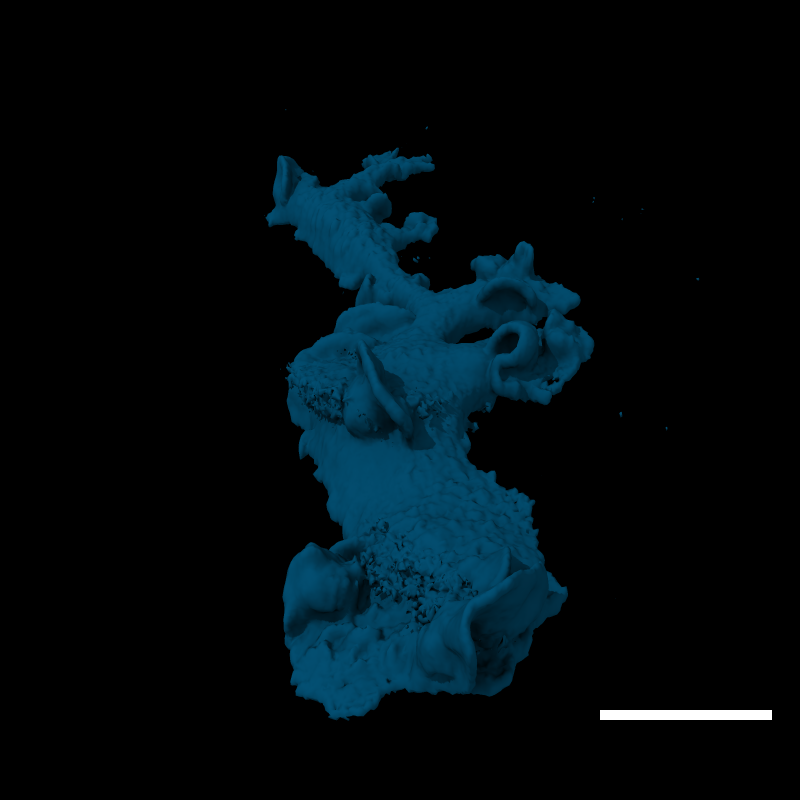
Input

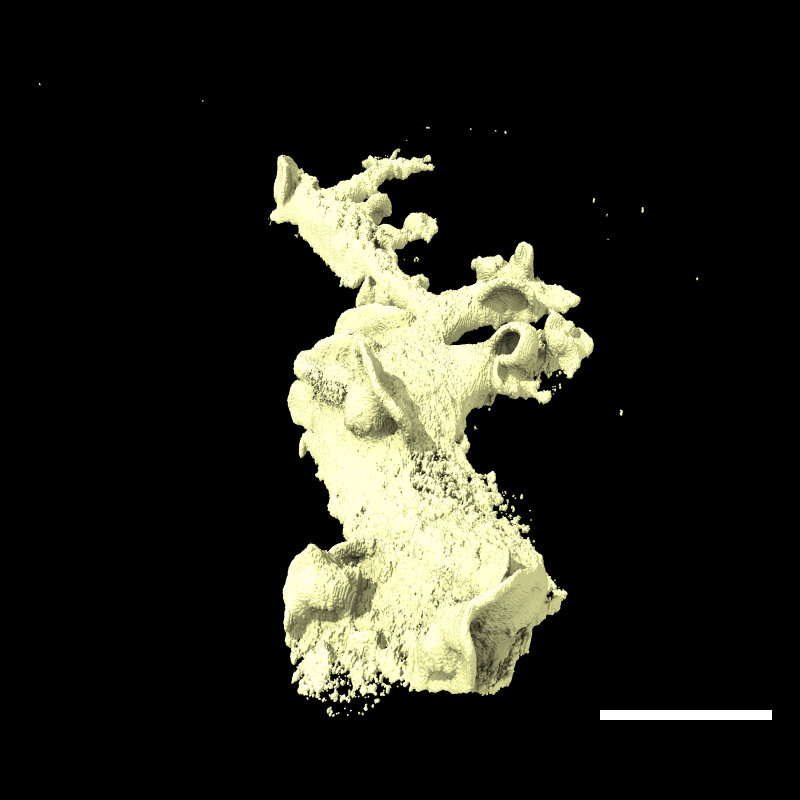
output

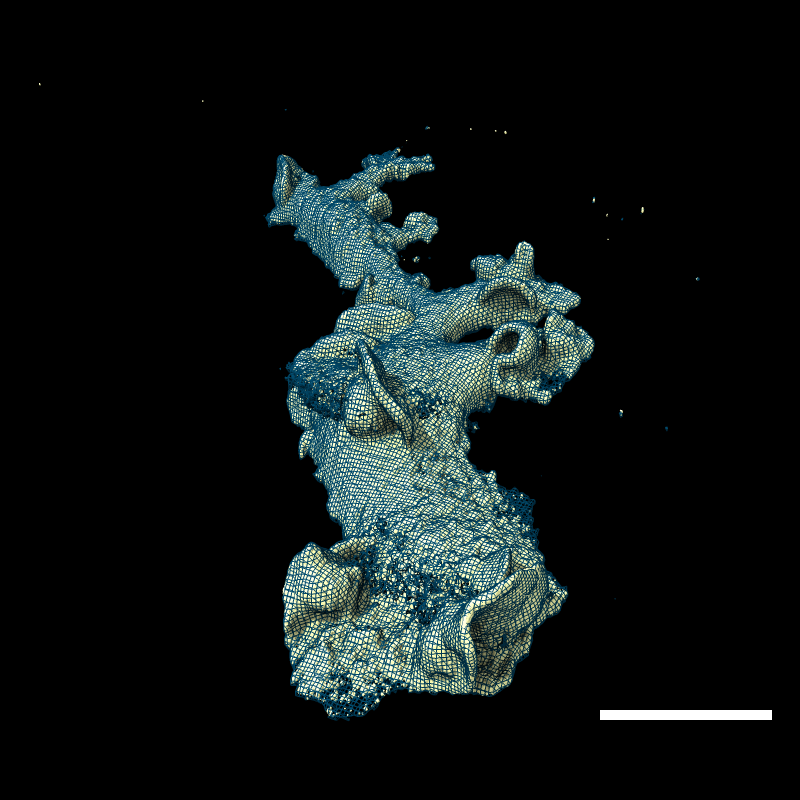
input over the output surface

Generates a new mirror of the masked contour map

In [ ]:

mask=ArrayGridData(((mask_vol<=level)))

volume_from_grid_data(mask,session)

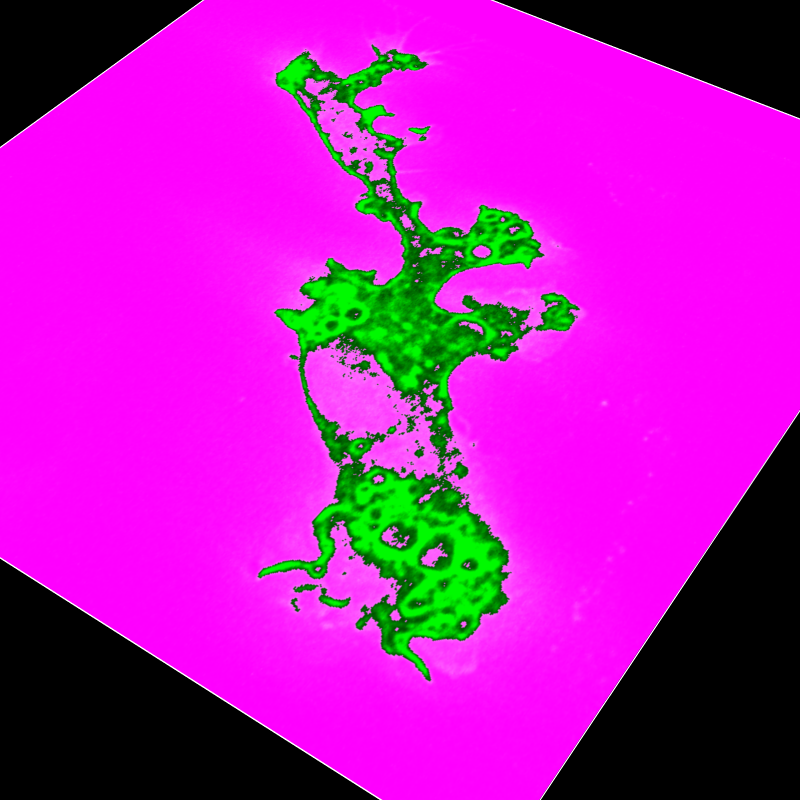
Inverting the surface level to get an inverted mask with voids and external objects identified

In [ ]:
inverted=((1/(1+mask_vol))>=(1/(level+1)))